(284807, 31)


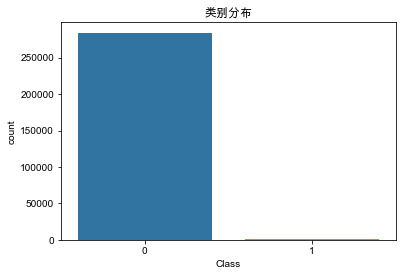

总交易笔数 284807
欺诈交易笔数 492
欺诈交易比例:0.001727485630620034%


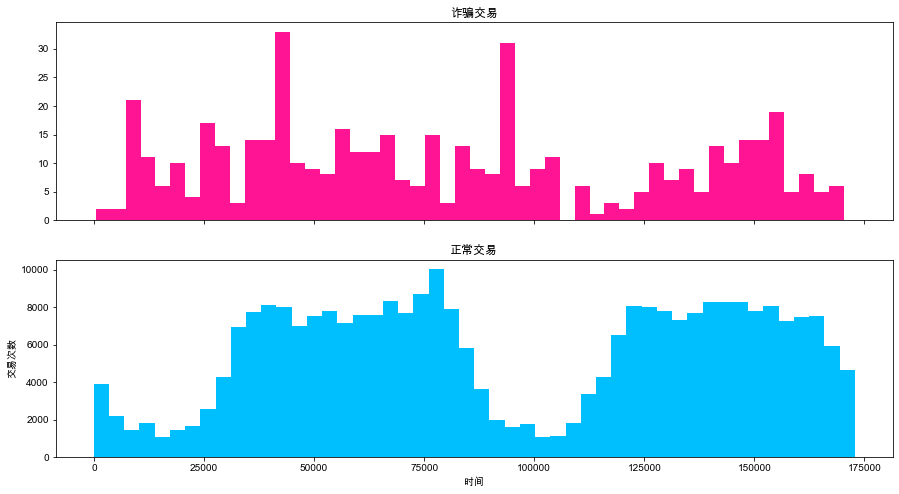

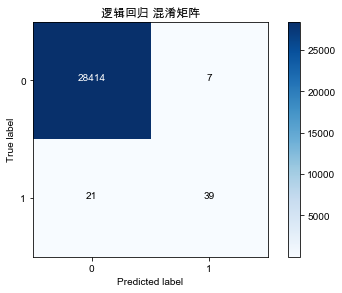

[[28414     7]
 [   21    39]]
tp:39,fn:21,fp:7,tn:28414
精确率:0.848
召回率:0.650
F1值:0.736


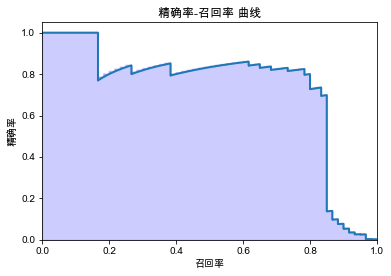

In [45]:
# 信用卡欺诈率(精确率，召回率和F1值)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 混淆矩阵可视化
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix"', cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm,interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment = 'center',
                color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# 显示模型评估结果
def show_metrics(cm):
    print(cm)
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print(f'tp:{tp},fn:{fn},fp:{fp},tn:{tn}')
    print('精确率:{:.3f}'.format(tp/(tp+fp)))
    print('召回率:{:.3f}'.format(tp/(tp+fn)))
    print('F1值:{:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))))

# 绘制精确率 - 召回率曲线
def plot_precision_recall(precision, recall, thresholds):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.plot(recall,precision,linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('召回率')
    plt.ylabel('精确率')
    plt.title('精确率-召回率 曲线')
    plt.show()

# 数据加载
data = pd.read_csv('~/credit_fraud/creditcard.csv')

# 数据探索
print(data.shape)
# print(data.describe())

# 设置plt正确显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 正常显示中文
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

# 绘制类别分布
plt.figure()
ax = sns.countplot(x = 'Class', data = data)
plt.title('类别分布')
plt.show()

# 显示交易笔数，欺诈交易笔数
num = len(data)
num_fraud = len(data[data['Class']==1])
print('总交易笔数', num)
print('欺诈交易笔数', num_fraud)
print(f'欺诈交易比例:{(num_fraud/num)}%')

# 欺诈和正常交易可视化
f, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(15,8))
bins = 50
ax1.hist(data.Time[data.Class==1], bins = bins, color = 'deeppink')
ax1.set_title('诈骗交易')
ax2.hist(data.Time[data.Class==0], bins = bins, color = 'deepskyblue')
ax2.set_title('正常交易')
plt.xlabel('时间')
plt.ylabel('交易次数')
plt.show()

# 对Amount进行数据可视化
data['Amount_norm'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

# 特征选择
y = np.array(data.Class.tolist())
data = data.drop(['Time','Amount','Class'], axis=1)

# pandas新版中已经使用values替代了as_matrix
x = np.array(data.iloc[:,:].values)

# 准备训练集和测试集
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.1,random_state=33)

# 逻辑回归分类
clf = LogisticRegression()
clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

# 预测样本的置信分数
score_y = clf.decision_function(test_x)

# 计算混淆矩阵，并显示
cm = confusion_matrix(test_y, pred_y)
class_names = [0,1]

# 显示混淆矩阵
plot_confusion_matrix(cm, classes=class_names, title='逻辑回归 混淆矩阵')

# 显示模型评估分数
show_metrics(cm)

# 计算精确率，召回率，阈值用于可视化
precision, recall, thresholds = precision_recall_curve(test_y, score_y)
plot_precision_recall(precision, recall, thresholds)

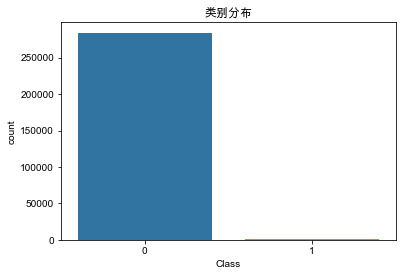

train_x:
 [[ 1.26616094  0.13906735  0.07105588 ... -0.10527404  0.00659046
  -0.25327724]
 [-0.56188244  0.28596817 -0.22996678 ...  0.14878981  0.17836596
  -0.26055375]
 [-1.48920293  0.4817497   1.93957238 ... -0.48562349 -0.12393208
  -0.27330765]
 ...
 [ 0.08986087  1.03332021 -0.319065   ...  0.22644086  0.07615262
  -0.34291433]
 [ 2.00738393 -0.35063669 -0.49760893 ...  0.04293656 -0.03016666
  -0.31328851]
 [-0.43664946  0.56520234  1.85510565 ...  0.04017233  0.04233576
  -0.33323896]] 
train_y:
 [0 0 0 ... 0 0 0]


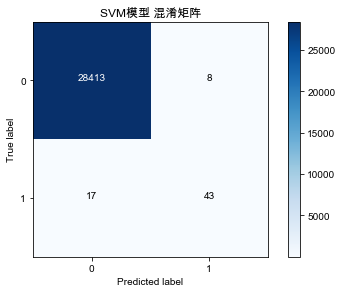

[[28413     8]
 [   17    43]]
tp:43,fn:17,fp:8,tn:28413
准确率:0.999
精确率:0.843
召回率:0.717
F1值:0.775


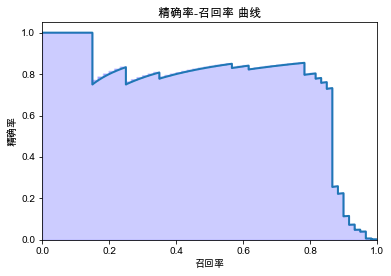

In [4]:
# 作业：使用线性SVM对信用卡欺诈数据集进行分类，病计算精确率、召回率和F1值
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 混淆矩阵可视化
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix"', cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm,interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment = 'center',
                color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# 显示模型评估结果
def show_metrics(cm):
    print(cm)
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print(f'tp:{tp},fn:{fn},fp:{fp},tn:{tn}')
    print('准确率:{:.3f}'.format((tp+tn)/(tp+tn+fn+fp)))
    print('精确率:{:.3f}'.format(tp/(tp+fp)))
    print('召回率:{:.3f}'.format(tp/(tp+fn)))
    print('F1值:{:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))))

# 绘制精确率 - 召回率曲线
def plot_precision_recall(precision, recall, thresholds):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.plot(recall,precision,linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('召回率')
    plt.ylabel('精确率')
    plt.title('精确率-召回率 曲线')
    plt.show()


# 加载数据
data = pd.read_csv('~/credit_fraud/creditcard.csv')

# 进行数据探索
# data.columns
# data.shape
# data.head(5)
# data.describe()

# # 设置plt正确显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 正常显示中文
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

# 绘制类别分布
plt.figure()
ax = sns.countplot(x = 'Class', data = data)
plt.title('类别分布')
plt.show()

# 对Amount进行数据规范化
data['Amount_norm']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

# 特征选择
y = np.array(data.Class.tolist())

data = data.drop(['Time','Amount','Class'], axis=1)

# pandas新版中已经使用values替代了as_matrix
x = np.array(data.values)


# # 准备训练集和测试集
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.1,random_state=33)
print('train_x:\n',train_x,'\ntrain_y:\n',train_y)

# 创建SVM分类器
model = svm.LinearSVC()
model.fit(train_x, train_y)
# 用测试集做预测
pred_y = model.predict(test_x)

# 预测样本的置信分数
score_y = model.decision_function(test_x)

# 计算混淆矩阵，病显示
cm = confusion_matrix(test_y, pred_y)
class_names = [0,1]

# 显示混淆矩阵
plot_confusion_matrix(cm, classes=class_names, title='SVM模型 混淆矩阵')

# 显示模型评估分数
show_metrics(cm)

# 计算精确率，召回率，阈值用于可视化
precision, recall, thresholds = precision_recall_curve(test_y, score_y)
plot_precision_recall(precision, recall, thresholds)